In [1]:
%matplotlib widget
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
plt.style.use("dark_background")

In [3]:
# generate x and y data, with uncertainties
rng = np.random.default_rng()
NDATA = 100
slope = -1.3
intercept = 3.4
xvals = rng.uniform(-5, 5, size=(NDATA,))
y_random = rng.uniform(-0.5, 0.5, size=(NDATA,))
yvals = slope * xvals + intercept + y_random
y_uncertainty = rng.uniform(0.1, 2, size=(NDATA,))

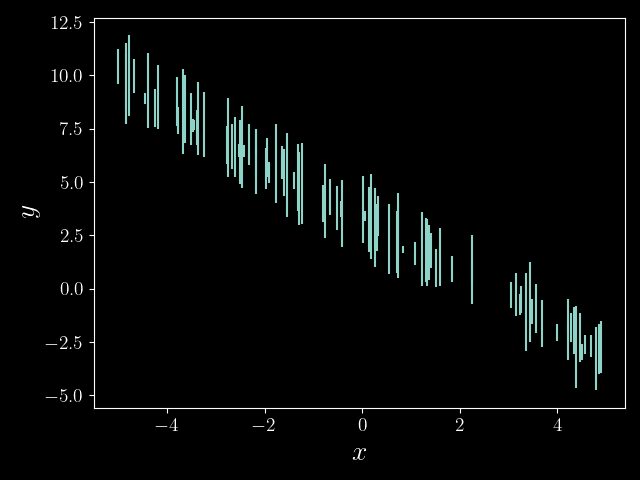

In [4]:
# plot
fig = plt.figure()
ax = plt.gca()
ax.errorbar(xvals, yvals, y_uncertainty, linestyle="")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
plt.tight_layout()
plt.show()

In [5]:
# calculate slope and intercept using maximum-likelihood estimation
s_val = np.sum(1 / y_uncertainty**2)
sx_val = np.sum(xvals / y_uncertainty**2)
sy_val = np.sum(yvals / y_uncertainty**2)
sxx_val = np.sum(xvals**2 / y_uncertainty**2)
sxy_val = np.sum(xvals * yvals / y_uncertainty**2)

delta = s_val * sxx_val - sx_val**2
aval = (sxx_val * sy_val - sx_val * sxy_val) / delta
bval = (s_val * sxy_val - sx_val * sy_val) / delta

In [6]:
print("aval: ", aval)
print("bval: ", bval)

aval:  3.3971479934815934
bval:  -1.3213155449792129


In [7]:
print("true aval: ", intercept)
print("true bval: ", slope)

true aval:  3.4
true bval:  -1.3


In [8]:
# calculate uncertainties on fit parameters
sigma_a = np.sqrt(sxx_val / delta)
sigma_b = np.sqrt(s_val / delta)

In [9]:
print(f"aval: {aval:0.5f} ± {sigma_a:0.5f}")
print(f"bval: {bval:0.5f} ± {sigma_b:0.5f}")

aval: 3.39715 ± 0.05253
bval: -1.32132 ± 0.01778


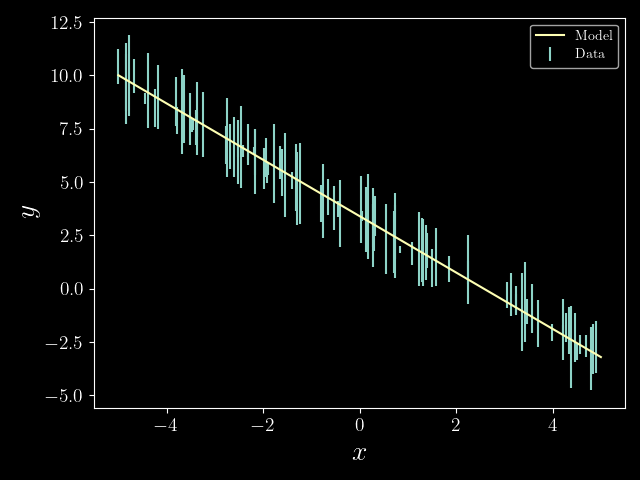

In [10]:
# compare "real data" with model
xmodel = np.linspace(-5, 5, num=1000)
ymodel = bval * xmodel + aval

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xvals, yvals, y_uncertainty, linestyle="", label="Data")
ax.plot(xmodel, ymodel, label="Model")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
ax.legend(loc=0)
plt.tight_layout()
plt.show()